In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    op1: str
    op2: str
    intermediate_result: int
    final_result: int

In [7]:
def adder1(state: AgentState) -> AgentState:
    state['intermediate_result'] = state['number1'] + state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    state['final_result'] = state['intermediate_result'] + state['number3'] + state['number4']
    return state

def subtractor1(state: AgentState) -> AgentState:
    state['intermediate_result'] = state['number1'] - state['number2']
    return state

def subtractor2(state: AgentState) -> AgentState:
    state['final_result'] = state['intermediate_result'] - state['number3'] - state['number4']
    return state

def decision_maker1(state: AgentState) -> str:
    if(state['op1'] == '+'):
        return 'add'
    
    elif(state['op1'] == '-'):
        return 'subtract'
    
    else:
        raise ValueError("Unsupported operation for op1")
    
def decision_maker2(state: AgentState) -> str:
    if(state['op2'] == '+'):
        return 'add'
    
    elif(state['op2'] == '-'):
        return 'subtract'
    
    else:
        raise ValueError("Unsupported operation for op2")

In [9]:
graph = StateGraph(AgentState)
graph.add_node("addition_step1", adder1)
graph.add_node("subtraction_step1", subtractor1)
graph.add_node("addition_step2", adder2)
graph.add_node("subtraction_step2", subtractor2)

graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decision_maker1,
    {
        "add": "addition_step1",
        "subtract": "subtraction_step1",
    }
)
graph.add_edge("addition_step1", "router2")
graph.add_edge("subtraction_step1", "router2")
graph.add_conditional_edges(
    "router2",
    decision_maker2,
    {
        "add": "addition_step2",
        "subtract": "subtraction_step2",
    }
)
graph.add_edge("addition_step2", END)
graph.add_edge("subtraction_step2", END)
app = graph.compile()

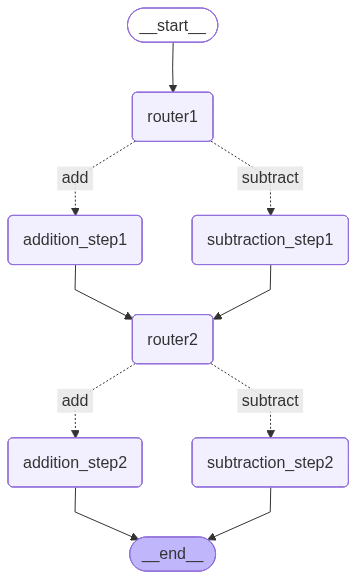

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({
    "number1": 10,
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "op1": "-",
    "op2": "+",
    })
print(result)  # Expected output: 10

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'op1': '-', 'op2': '+', 'intermediate_result': 5, 'final_result': 14}
